In [35]:
import numpy as np
import matplotlib.pylab as plt
from scipy.ndimage.filters import median_filter

import tvdip

np.random.seed(42)
%matplotlib inline

## Piecewise constant signal (PWC) denoising
This notebook provides examples of several different methods for denoising piecewise constant signals. The methods used are:
- moving average
- moving median
- total variance scaling (a method seeking to jointly minimize the L-1 first differences of the smoothed signal $m$ and the L-2 squared residuals of the smoothed signal $m$ from the noisy signal $x$; see M.A. Little, Nick S. Jones (2010) "Sparse Bayesian Step-Filtering for High-Throughput Analysis of Molecular Machine Dynamics")

### Defining a nosiy signal $x$

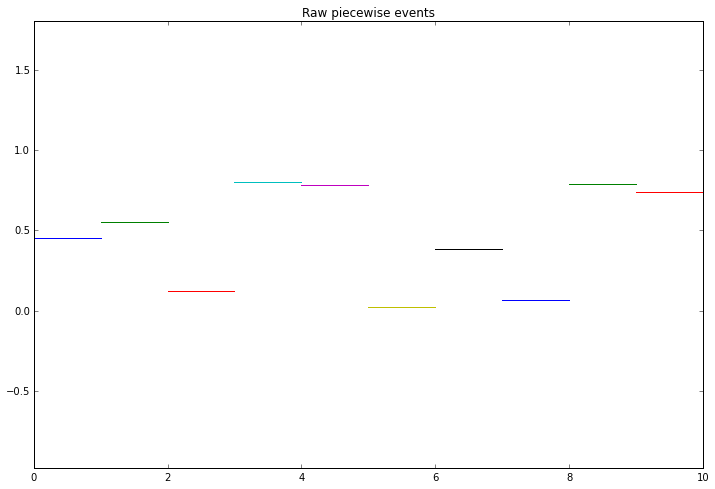

In [29]:
N = 10

xs = np.arange(N)
ys = np.random.rand(N)

plt.figure(figsize=(12,8), dpi=300)
plt.ylim([ys.min() - 1, ys.max() + 1])
for x,y in zip(xs, ys) :
    plt.plot([x,x+1],[y,y])
plt.title('Raw piecewise events')
plt.savefig('events.png')
plt.show()

In [30]:
sample_freq = 1000
noise_factor = 0.1

signal = np.array(sum([[y] * sample_freq for y in ys], []))
srange = signal.max() - signal.min()
noise = np.random.normal(0, srange * noise_factor, size=signal.shape)
nsignal = signal + noise

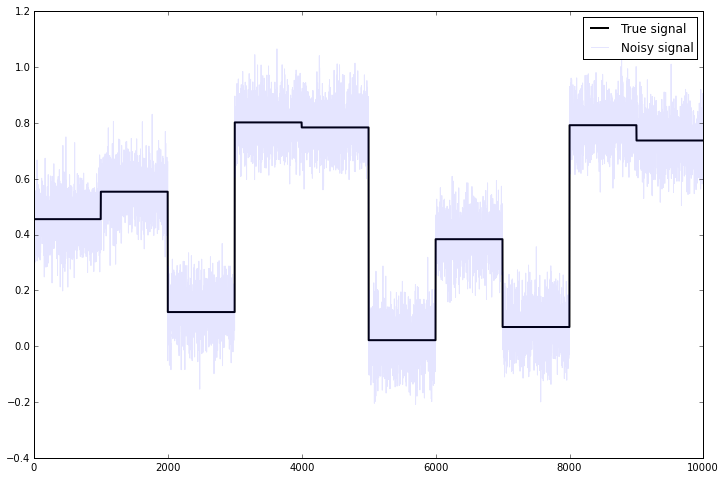

In [31]:
plt.figure(figsize=(12,8), dpi=300)
plt.plot(signal, color='k', alpha=1.0, linewidth=2, label='True signal')
plt.plot(nsignal, color='b', alpha=0.1, linewidth=1, label='Noisy signal')
plt.legend()
plt.savefig('noised-events.png')
plt.show()

### Moving average

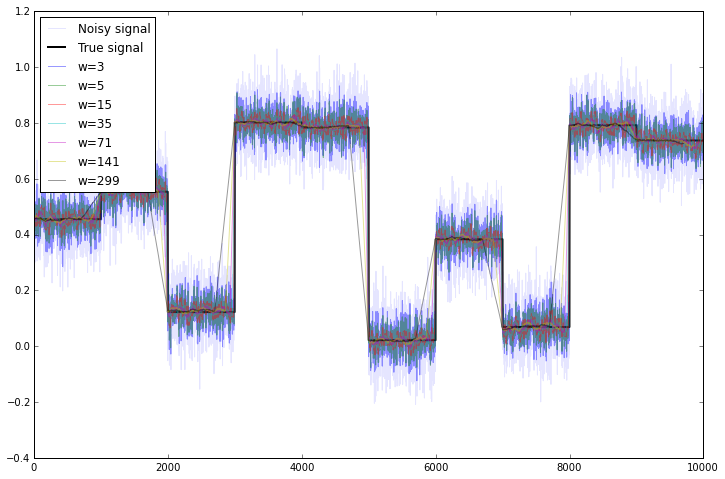

In [41]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

mov_avg_sizes = [3,5,15,35,71,141,299]
mov_avgs = map(lambda s : moving_average(nsignal, s), mov_avg_sizes)

plt.figure(figsize=(12,8),dpi=300)
plt.plot(nsignal, color='b', alpha=0.1, linewidth=1, label='Noisy signal')
plt.plot(signal, color='k', alpha=1.0, linewidth=2, label='True signal')
for ma, si in zip(mov_avgs, mov_avg_sizes) :
    plt.plot(ma, alpha=0.4, label='w={}'.format(si))
plt.legend(loc=2)
plt.savefig('mov_avg.png')
plt.show()

### Median filter

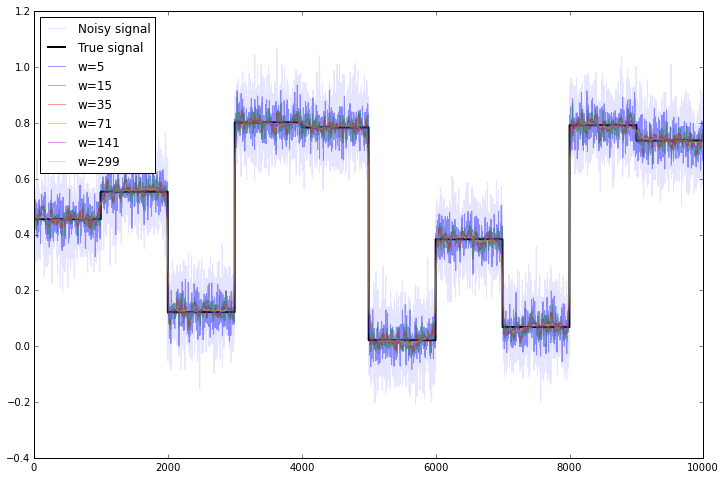

In [39]:
median_sizes = [5,15,35,71,141,299]
medians = map(lambda s : median_filter(nsignal, s), median_sizes)

plt.figure(figsize=(12,8),dpi=300)
plt.plot(nsignal, color='b', alpha=0.1, linewidth=1, label='Noisy signal')
plt.plot(signal, color='k', alpha=1.0, linewidth=2, label='True signal')
for ma, si in zip(medians, median_sizes) :
    plt.plot(ma, alpha=0.4, label='w={}'.format(si))
plt.legend(loc=2)
plt.savefig('median_filter.png')
plt.show()

### Total variance denoising

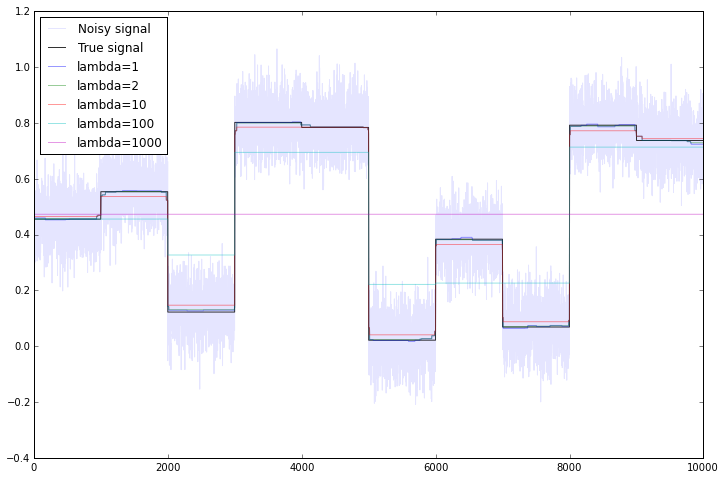

In [33]:
lambdas = np.array([1, 2, 10, 100, 1000])
x, E, s, lmax = tvdip.tvdip(nsignal.reshape(nsignal.shape[0], 1), lambdas, display=0, stoptol=1e-5, maxiter=100)
x = x.T

plt.figure(figsize=(12,8),dpi=300)
plt.plot(nsignal, color='b', alpha=0.1, linewidth=1, label='Noisy signal')
plt.plot(signal, color='k', alpha=0.8, linewidth=1, label='True signal')
for xi, lm in zip(x, lambdas) :
    plt.plot(xi, alpha=0.4, label='lambda={}'.format(lm))
plt.legend(loc=2)
plt.savefig('tvdip.png')
plt.show()

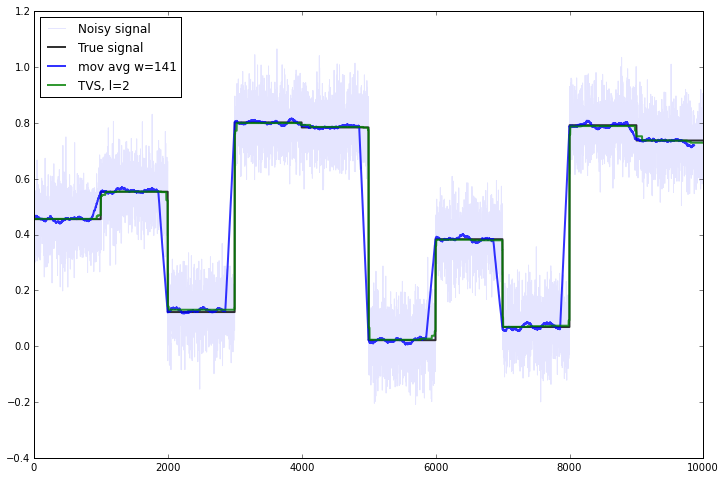

In [34]:
plt.figure(figsize=(12,8),dpi=300)
plt.plot(nsignal, color='b', alpha=0.1, linewidth=1, label='Noisy signal')
plt.plot(signal, color='k', alpha=0.8, linewidth=2, label='True signal')
plt.plot(mov_avgs[-2], alpha=0.8, linewidth=2, label='mov avg w={}'.format(mov_avg_sizes[-2]))
plt.plot(x[1], alpha=0.8, linewidth=2, label='TVS, l={}'.format(lambdas[1]))
plt.legend(loc=2)
plt.savefig('tvdip_movavg_compare.png')
plt.show()